# Automatic Differentiation Using Dual Numbers

### Introduction
This Jupyter Notebook is designed as a guide to illustrate how to use the dual_autodiff package, a Python package created to perform automatic differentiations using dual numbers. Firstly, a brief introduction on the concepts of dual numbers and automatic differentiations, then some examples on how to use the package. The package contains all trigonometric and hyperbolic functions, furthermore the exponential and logarithmic functions. <span style="color:red">The only dependency in the package is numpy, for more infromation on numpy see [link](https://numpy.org/), make sure all the packages required in dual_autodiff are also installed</span> 



TO-DO:
- KEEP AN EYE ON THE RED TEXTS (NEED MODIFICATION)
- add a set up section that expains how to create a virtual enviroment and install the package using `pip install -e .`
- ADD ANOTHER CLASS CALLED DERIVATIVE TO COMPUTE THE NUMERICAL DERIVATIVE (maybe not required in numpy you have gradient which computes the derivative, scipy.misc has derivative and more)
- ADD A PLOTTING OPTION TO CLASS DUAL SO THAT IT COMPUTES THE DUAL WITH A RANGE OF VALUES INSTEAD OF SIGLE OPINTS, E.G. `x = np.linspace()` as input


### Background

#### Dual Numbers


### Set Up

In [ ]:
from dual_autodiff import Dual
from dual_autodiff import NumDiff

In [ ]:
import dual_autodiff

In [ ]:
x = Dual(2,1)
print(x)

Dual(real = 2, dual = 1)


In [ ]:
x.sin().dual

np.float64(-0.4161468365471424)

In [ ]:
x = Dual(1.5, 1) # choose 1 for dual so we obtain the derivative
f_x  = x.sin().log() + x**2*x.cos() # log(sin(x)) + x**2cos(x)

derivative_at_x_real = f_x.dual
print(derivative_at_x_real)



-1.9612372705533612


In [ ]:
from dual_autodiff import NumDiff as nd # numerical differentiation

def f(x):
    return x**2

y_der = nd(f, 2, 0.1)
dy = y_der.first_central()
print(dy)

4.000000000000001


 Computing the derivative of $f(x)$:
 $$
 \begin{align*}
 f(x) &= log(sin(x)) + x^2cos(x)\\
 f'(x) &= cot(x) +  2xcos(x) - x^2sin(x)
 \end{align*}
 $$
 When one defines the dual variable $x$ to determine the derivative of any fucntions $f(x)$ with respect to $x$, should always set the dual part of $x$ equal to $1$. For instance, running the code `x = Dual(1.5, 1)`, will ensure that the derivative of the function $f(x)$ at $Real(x) = 1.5$ is given by the dual part of $f(x)$. Given $x = a + \epsilon b$, then:
  $$
\begin{align*} 
f(x) = f(a + \epsilon b) = f(a) + \epsilon b f'(a)\\
\end{align*}
$$
  set $b=1$ thus,
$$
\begin{align*} 
f(x) = f(a + \epsilon) = f(a) + \epsilon f'(a)
\end{align*}
$$
Hence the derivative of $f(x)$ is given by its dual part.

Let us code the above:

In [ ]:
import numpy as np
import pandas as pd
from dual_autodiff import Dual
from dual_autodiff import NumDiff

# f(x)
def f(x):
    return np.log(np.sin(x)) + x**2*np.cos(x)

# f'(x) 
def df_true(x):
    return 1/np.tan(x) + 2*x*np.cos(x) - x**2*np.sin(x)

# Dual derivative
x = Dual(1.5,1) # set dual part equal to 1
f_dual = x.sin().log() + (x**2)*x.cos()
df_dual = f_dual.dual # take the dual part of f to find its derivative at x.real=1.5 

# Numerical solution
h = 0.01 # step size
ndf = NumDiff(f, x.real, h) # x=1.5 
ndf_for = ndf.first_forward() # forward difference
ndf_cen = ndf.first_central() # central difference
ndf_bac = ndf.first_backward() # backward difference

# Analytical derivative
true_der = df_true(x.real)

# defining all measures to determine the ratio and the error between analytical and dual/numerical
def ratio(n,m):
    return abs(n/m)

def absolute_error(n,m):
    return abs(n-m)

# create a dataset to display the impormation collected using pandas

information = {
    "Automatic Differentiation": [df_dual, ratio(df_dual,true_der), absolute_error(df_dual, true_der)],
    "Forward Differentiation": [ndf_for, ratio(ndf_for,true_der), absolute_error(ndf_for, true_der)],
    "Central Differentiation": [ndf_cen, ratio(ndf_cen,true_der), absolute_error(ndf_cen, true_der)],
    "Backward Differentiation":[ndf_bac, ratio(ndf_bac,true_der), absolute_error(ndf_bac, true_der)]
}

results = pd.DataFrame(information, index=["Results", "Ratio", "Absolute Error"])
results

,Automatic Differentiation,Forward Differentiation,Central Differentiation,Backward Differentiation
Results,-1.961237,-1.996346,-1.961308,-1.926270
Ratio,1.000000,1.017901,1.000036,0.982171
Absolute Error,0.000000,0.035109,0.000071,0.034967


In [ ]:
# TASK 5

from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from dual_autodiff import NumDiff
from dual_autodiff import Dual

def plot_with_parameters(h): 

    def f(x): 
        return np.log(np.sin(x)) + x**2*np.cos(x)

    def df_true(x): 
        return 1/np.tan(x) + 2*x*np.cos(x) - x**2*np.sin(x)

    # Dual derivative
    x_space = np.linspace(1, 2, 100)
    x = Dual(x_space, 1) # set dual part equal to 1
    f_dual = x.sin().log() + (x**2)*x.cos()
    df_dual = f_dual.dual # take the dual part of f to find its derivative at x.real=1.5 

# Analytical derivative
    true_der = df_true(x.real)

    # Calculate f(t) for these parameters
    ndf = NumDiff(f, x.real, h) # x=1.5 
    ndf_for = ndf.first_forward() # forward difference
    ndf_cen = ndf.first_central() # central difference
    ndf_bac = ndf.first_backward() # backward difference

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_space, true_der, label='First Order Analytical')
    plt.plot(x_space, df_dual, label='Automatic Differentiation', color = 'black', linestyle = ':')
    plt.plot(x_space, ndf_cen, label='First Order Numerical Central', color = 'red', linestyle = '--')
    plt.plot(x_space, ndf_for, label='First Order Numerical Forward', color = 'purple', linestyle = '--')
    plt.plot(x_space, ndf_bac, label='First Order Numerical Backward', color = 'blue', linestyle = '--')
    plt.xlabel('x')
    plt.ylabel(r'$\frac{df}{dx} = cot(x) +  2xcos(x) - x^2sin(x)$')
    plt.title('Numerical vs Analytical')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    h=widgets.FloatSlider(min=10**(-5), max=0.99, step=0.01, value=0.1),
)
display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='h', max=0.99, min=1e-05, step=0.01), Output()), _dom…

In [ ]:
import matplotlib

In [ ]:
x=Dual(2, 6)
y=Dual(4, -2)
n=2

print(x//y)
print((((8 * 4) - (2 * -2)) // (4 ** 2)))
print(x//n)

Dual(real = 0, dual = 1)
2
Dual(real = 1, dual = 3)


In [ ]:
x = Dual(3,1)
f_x = (x.tanh().cosh())**2 + x.sinh().sin().exp().tan() + x.log().cos()
print(f_x)

Dual(real = 3.461624963063523, dual = -7.012115744346404)


In [ ]:
from tests import TestDual
from tests import NumDiff
import ipytest


ipytest.run()


======================================= test session starts ========================================
platform linux -- Python 3.12.3, pytest-8.3.3, pluggy-1.5.0
rootdir: /root/Document/Python_Script/dual_autodiff
configfile: pyproject.toml
collected 21 items

t_c07959b4f95a4af2b0a2fb5a253a4167.py ...................EE                                  [100%]

============================================== ERRORS ==============================================
___________________________________ ERROR at setup of test_dual ____________________________________
file /tmp/ipykernel_127910/254714990.py, line 1
  def test_dual(a,b):
E       fixture 'a' not found
>       available fixtures: cache, capfd, capfdbinary, caplog, capsys, capsysbinary, doctest_namespace, monkeypatch, pytestconfig, record_property, record_testsuite_property, record_xml_attribute, recwarn, tmp_path, tmp_path_factory, tmpdir, tmpdir_factory
>       use 'pytest --fixtures [testpath]' for help on them.

/tmp/ipykernel_127

<ExitCode.TESTS_FAILED: 1>

### Automatic Differentiation In 1D

Add text here!

For a function $f(x)$, whose domain are dual numbers, i.e. $a + \epsilon b$, where both $a,b \in \R$, then
$$
f(a + \epsilon b) = f(x)|_{x=a} + \epsilon b f'(x)|_{x=a}
$$


### Automatic Differentiation In Higher Dimensions

We have seen how automatic differentiation using dual numbers is utilised in one dimension, but can we extend this into higher dimensions?  The answer is yes. One can compute first order partial derivatives with respect to each variable for a high dimensional function. 

Consider the function $f(\vec{x})$, where $\vec{x} = (x_1, x_2,...,x_n)^T$, whose domain $\vec{a} + \epsilon \vec{b}$, where $\vec{a} = (a_1, a_2,...,a_n)^T$ and $\vec{b} = (b_1, b_2,...,b_n)^T$, then we can extend the one dimensional model to higher dimensions as follow:
$$
f(\vec{a} + \epsilon \vec{b}) = f(\vec{x})|_{\vec{x}=\vec{a}} + \epsilon \sum^n_{i=1} b_i \frac{\partial f(\vec{x})}{\partial x_i}|_{\vec{x} = \vec{a}}
$$

If we set all $b_i=1$ then the dual part of $f(\vec{a} + \epsilon \vec{b})$ will be the sum of partial derivatives evaluated at $\vec{x} = \vec{a}$, but what if one wants to perform the partial derivative with repsect to a single valriable? The answer this question rather simple, we need to elimina the unwanted partial derivatives.

Let us define a new function $f_j(\vec{x})$, such that:
$$
f_j(\vec{a} + \epsilon \vec{b}) = f(\vec{x})|_{\vec{x}=\vec{a}} + \epsilon \sum^n_{i=1} \delta_{ij} b_i \frac{\partial f(\vec{x})}{\partial x_i}|_{\vec{x} = \vec{a}}
$$ 
where $\delta_{ij}$ is the kronecker delta, such that;
$$
\delta_{ij} = 
\begin{cases} 
0 & \text{when } i \neq j \\ 
1 & \text{when } i = j\\
\end{cases}
$$
And $\vec{b} = [1,1,1,...,1]^T$, $\vec{a}$ is the collection of point where the partial derivative of $f(\vec{x})$ is evaluated at. One can simplify the above equation into:
$$
f_j(\vec{a} + \epsilon \vec{b}) = f(\vec{x})|_{\vec{x}=\vec{a}} + \epsilon b_j \frac{\partial f(\vec{x})}{\partial x_j}|_{\vec{x} = \vec{a}}
$$

The index $j$ is the albitrary choice of the variable we want to differentiate for, e.g. if one wants to compute the partial derivative of $f(\vec{x})$ with respect to $x_2$ then set $j=2$, here we will see how:



In [ ]:
from dual_autodiff import Dual 

def f1(x,y): 
    return x*y

dual = Dual(1,0)
x,y = 2,3

partial = dual.partial_derivative(1,f1,x,y)
print(partial)


2


$\sech{a}$ $sina$ $e^{a}$

In [ ]:
from dual_autodiff import Dual
x = Dual(2,6)
exp_x = x.tanh()
print(f'tanh(x) = {exp_x}')

tanh(x) = Dual(real = 0.9640275800758169, dual = 0.4239049491189868)


In [ ]:
def f2(x,y,z):
    return x*y + x*z.cos() + y.sin()

d = Dual(0,0)

x,y,z=Dual(1,0),Dual(-1,0),Dual(2,0)

x_partial = d.partial_derivative(0,f2,x,y,z)
y_partial = d.partial_derivative(1,f2,x,y,z)
z_partial = d.partial_derivative(2,f2,x,y,z)

print(f"Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is {x_partial}")
print(f"Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is {y_partial}")
print(f"Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is {z_partial}")

Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is -1.4161468365471424
Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is 1.5403023058681398
Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is -0.9092974268256817


In [ ]:
from dual_autodiff import Dual 
import dual_autodiff as df

def f1(x,y): 
    return x*y

x,y = Dual(2,1), Dual(3,0)


df_dx = f1(x,y)
print(df_dx.dual)



3


In [ ]:
from dual_autodiff import NumDiff
import numpy as np

def f(x):
    return x + np.exp(x-x**2)
x0 = 2
h = 0.01
derivative = NumDiff(f,x0,h)
result = derivative.first_forward()
print(f'Forward difference of f(x) at the point x0 = {x0}, with stepsize h = {h}, is {result}')


Forward difference of f(x) at the point x0 = 2, with stepsize h = 0.01, is 0.5987105016421079


In [ ]:
result = derivative.first_backward()
print(f'Backward difference of f(x) at the point x0 = {x0}, with stepsize h = {h}, is {result}')

Backward difference of f(x) at the point x0 = 2, with stepsize h = 0.01, is 0.5892372009922209


In [ ]:
result = derivative.first_central()
print(f'Central difference of f(x) at the point x0 = {x0}, with stepsize h = {h}, is {result}')

Central difference of f(x) at the point x0 = 2, with stepsize h = 0.01, is 0.5939738513171644


In [ ]:
result = derivative.second_order()
print(f'Second derivative of f(x) at the point x0 = {x0}, with stepsize h = {h}, is {result}')
print('need to update')

Second derivative of f(x) at the point x0 = 2, with stepsize h = 0.01, is 0.9473300649887051
need to update


In [ ]:
from dual_autodiff import Dual

x, y, z, m = Dual(2,1), Dual(-10,2), Dual(-1,-1), Dual(999,0)

print(x*y - m + z)

Dual(real = -1020, dual = -7)


In [ ]:
from src.dual_autodiff_x import DualX

def f2(x,y,z):
    return x*y + x*z.cos() + y.sin()

d = DualX(0,0)

x,y,z=DualX(1,0),DualX(-1,0),DualX(2,0)

x_partial = d.partial_derivative(0,f2,x,y,z)
y_partial = d.partial_derivative(1,f2,x,y,z)
z_partial = d.partial_derivative(2,f2,x,y,z)

print(f"Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is {x_partial}")
print(f"Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is {y_partial}")
print(f"Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is {z_partial}")

Partial derivaive of f with respect to x, at x,y,z=1,-1,2 is -1.4161468365471424
Partial derivaive of f with respect to y, at x,y,z=1,-1,2 is 1.5403023058681398
Partial derivaive of f with respect to z, at x,y,z=1,-1,2 is -0.9092974268256817


In [ ]:
from src.dual_autodiff_x import DualX
x = DualX(2,1)
print(-x.dual)

from dual_autodiff import Dual
y = Dual(2,1)
print(y.dual)

-1
1


In [ ]:
fun_cython=(x.cos()).exp()
print(fun_cython.real)
print(fun_cython.dual)

fun_python=(y.cos()).exp()
print(fun_python.real)
print(fun_python.dual)

0.6595834124225789
-0.5997574996927534
0.6595834124225789
-0.5997574996927534


In [ ]:
def test_dual(a,b):
    return Dual(a,b)
def test_dual_x(a,b):
    return DualX(a,b)    

In [ ]:
import timeit

%timeit test_dual(2,1)
%timeit test_dual_x(2,1)

144 ns ± 3.04 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
82.1 ns ± 5.59 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [ ]:
def f(x):
    return x**2

In [ ]:
from src.dual_autodiff_x import NumDiffX as NDX 
from dual_autodiff import NumDiff as ND 

def non_cythonized(f, x, h):
    der=ND(f,x,h)
    return der.first_central()

def cythonized(f, x, h):
    der=NDX(f,x,h)
    return der.first_central()

In [ ]:
import timeit

%timeit non_cythonized(f,2,0.1)
%timeit cythonized(f,2,0.1)

449 ns ± 5.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
318 ns ± 3.03 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


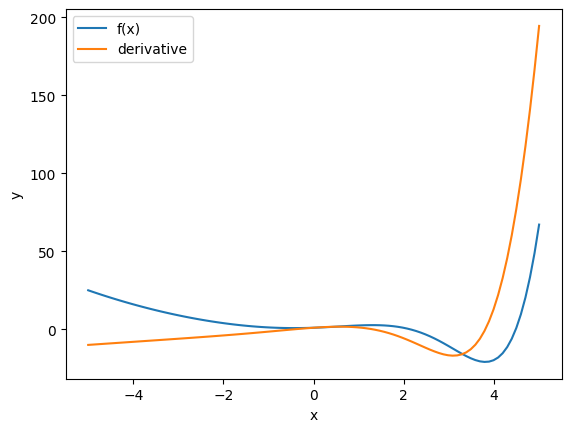

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + np.cos(x)*np.exp(x)

x_space = np.linspace(-5,5,100)
der_fcython=NDX(f,x_space,0.01)
der_NDX=der_fcython.first_central()

plt.plot(x_space, f(x_space), label = 'f(x)')
plt.plot(x_space, der_NDX, label = 'derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
"poetry.core.masonry.api"

'poetry.core.masonry.api'

### Exercises

Now try yourself. 

Complete the following sets of exercises, solutions are provided 